In [6]:
import pandas as pd
from const import URL_DATABASE
from utils import create_engine
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import shapiro
from utils import add_split_date

In [7]:
dbEngine = create_engine(URL_DATABASE)
connection = dbEngine.connect()

In [8]:
df = pd.read_sql_table('wig', connection)
del df['index']
add_split_date(df)
df

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,year,month,day
0,1991-04-16,100.00,100.00,100.00,100.00,325.0,1991,4,16
1,1991-04-23,95.70,95.70,95.70,95.70,5905.0,1991,4,23
2,1991-04-30,93.50,93.50,93.50,93.50,7162.0,1991,4,30
3,1991-05-14,92.90,92.90,92.90,92.90,18300.0,1991,5,14
4,1991-05-21,95.50,95.50,95.50,95.50,14750.0,1991,5,21
...,...,...,...,...,...,...,...,...,...
7476,2022-12-22,1786.63,1796.05,1774.71,1780.07,10579489.0,2022,12,22
7477,2022-12-23,1778.58,1782.76,1769.41,1780.27,8034718.0,2022,12,23
7478,2022-12-27,1788.67,1792.82,1762.64,1765.87,6876220.0,2022,12,27
7479,2022-12-28,1764.30,1776.98,1757.71,1767.88,10436182.0,2022,12,28


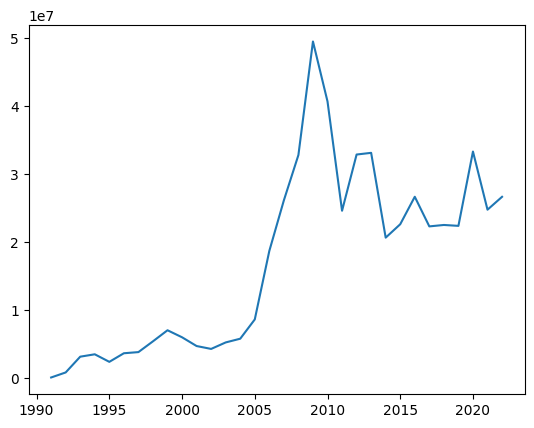

In [9]:
from matplotlib import pyplot as plt

# Hipoteza
# wraz z kolejnymi latami zwiększa się liczba sprzedawanych wolumenów

mean_wolumen = df.groupby(['year'], as_index=False).agg({'Wolumen':['mean']}).round(2)

plt.plot(mean_wolumen['year'], mean_wolumen['Wolumen'])
plt.show()


In [10]:
stat1, p1 = shapiro(df['Wolumen'])
stat2, p2 = shapiro(df['Otwarcie'])
stat3, p3 = shapiro(df['year'])

if p1 > 0.05 and p2 > 0.05 and p3 > 0.05:
    print('Dane pochodzą z rozkładu normalnego')
else:
    print('Dane nie pochodzą z rozkładu normalnego')

Dane nie pochodzą z rozkładu normalnego


C:\Users\Mateusz\PycharmProjects\venv\BiS\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### test dla zmiennych zależnych

In [11]:
stat, p = ttest_rel(df['year'], df['Wolumen'])

# Jeśli p-wartość jest mniejsza niż 0,05, można uznać, że różnice są istotne statystycznie
print(p)
if p < 0.05:
    print('Różnice są istotne statystycznie')
else:
    print('Różnice nie są istotne statystycznie')



0.0
Różnice są istotne statystycznie


In [12]:
stat, p = ttest_rel(df['Otwarcie'], df['Zamkniecie'])
print(p)
if p < 0.05:
    print('Różnice są istotne statystycznie')
else:
    print('Różnice nie są istotne statystycznie')

0.12007149978527402
Różnice nie są istotne statystycznie


### test dla zmiennych niezależnych

In [13]:
stat, p = ttest_ind(df['year'], df['Wolumen'])
print(p)
if p < 0.05:
    print('Różnice są istotne statystycznie')
else:
    print('Różnice nie są istotne statystycznie')

0.0
Różnice są istotne statystycznie


In [14]:
stat, p = ttest_ind(df['Najnizszy'], df['Najwyzszy'])
print(p)
if p < 0.05:
    print('Różnice są istotne statystycznie')
else:
    print('Różnice nie są istotne statystycznie')

0.008151214115062198
Różnice są istotne statystycznie


### ANOVA

In [15]:
stat, p = f_oneway(df['Otwarcie'], df['Zamkniecie'], df['year'], df['Wolumen'])
print(p)
if p < 0.05:
    print('Różnice są istotne statystycznie')
else:
    print('Różnice nie są istotne statystycznie')

0.0
Różnice są istotne statystycznie
